#### 머신러닝을 위한 데이터 처리 절차
1. 데이터 수집
2. 통계적 데이터 탐색
3. 시각적 데이터 탐색
4. 데이터 전처리
5. 탐색적 데이터 분석과 상관 분석
6. 머신러닝 알고리즘 선정
7. 머신러닝 수행

**2. 통계적 데이터 탐색**

##### 데이터의 분류

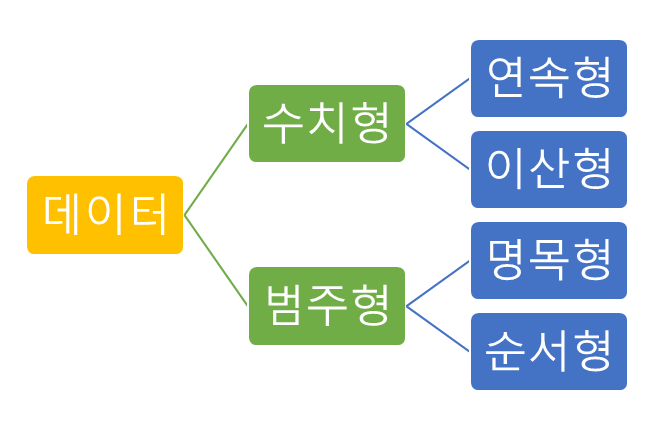

**기술통계량**

- 중심경향(평균, 중앙값, 최빈값) : 데이터들의 중심을 표현하기 위한 값
- 산포도(데이터가 퍼짐 정도)

- 평균 : 산술평균, 기하평균, 조화평균

##### 산술평균
- 모든 데이터를 합한 결과를 전체 개수로 나눈 값

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [26]:
df['total_bill'].mean()

19.78594262295082

In [28]:
np.mean(df['total_bill'])

19.78594262295082

##### 기하평균
- n개의 양수 값을 모두 곱한 것의 n제곱근
- 다기간의 수익률에 대한 평균 수익률, 평균 물가상승률 등을 구할 때

In [31]:
pA = [240, 260, 270, 290, 360]
pB = [250, 280, 270, 280, 360]

In [33]:
def up(s, e, len):
    return (e / s) ** (1/len) -1

In [35]:
up(pA[0], pA[-1] , len(pA) )

0.08447177119769855

##### 조화평균
- 각 요소의 역수의 산술평균을 구한 후 다시 역수를 취하는 형태로 표현

**분류의 성능을 측정하는 방법**
- Precision(정확도, 정밀도), Recall(재현률), F1-score(Precision과 Recall의 조화평균), Accuracy(정확도)

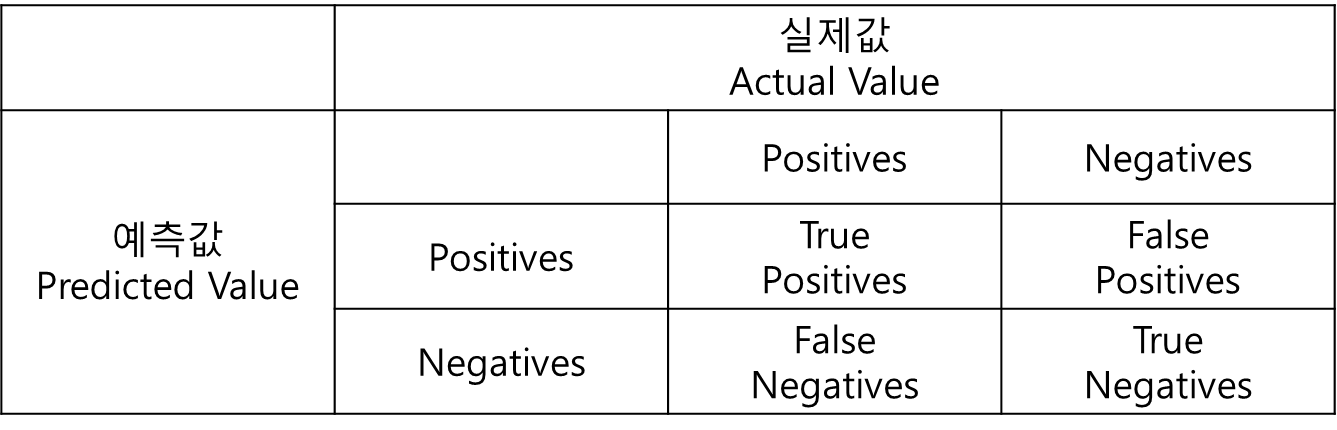

- Accuracy = (TP + TN) / (TP+TN+FP+FN)
- Precision(정밀도) = TP / (TP + FP)
- Recall(재현율) = TP / (TP + FN)
- F1-score = (2 * Precision * Recall) / (Precision + Recall)

- 중앙값(median) : 전체 데이터를 오른차순 배열했을 때 중앙에 위치한 값
- 최빈값(mode) : 가장 많이 발생된 값

In [58]:
a = pd.Series([4,3,5,7,4,3,5,3,5,3,5,3,3,5,6,6,4,4,6,7,7,45])
a.mode()

0    3
dtype: int64

In [56]:
type(df['size'])

pandas.core.series.Series

##### 산포도 : 데이터가 중심에서 얼마나 떨어져있는지를 측정하는 척도
- 분산 : 평균과 각 요소의 차이값의 제곱한 값의 평균
  - 분산이 클수록 각 데이터 값이 평균으로부터 넓게 흩어진 상태
- 표준편차 : 분산의 제곱근
- 범위 : 최대값과 최소값의 차이
- 사분위수 : 전체 데이터를 오름차순으로 정렬 후 4등분으로 분할

##### 분위수(Quantile)
- 사분위수, 십분위수, 백분위수
- 사분위수 범위( Inter Quantile Range = IQR )
   - 전체 데이터를 오름차순으로 정렬한 후 25%(1사분위) 순위에서 75%(3사분위) 순위 사이의 범위

- 변수
  - 원인 : feature, 입력, 독립변수, 설명변수, 예측변수
  - 결과 : target, 출력, 종속변수, 반응변수, 결과변수

#### 3. 시각적 데이터 탐색

In [79]:
len(df)

244

In [81]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
desc = df.describe()
desc

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [85]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [99]:
desc['total_bill']['std']

8.902411954856856

In [103]:
q3 = desc['total_bill']['75%']
q3

24.127499999999998

In [105]:
q1 = desc['total_bill']['25%']
q1

13.3475

In [111]:
# 범주형 데이터의 기술통계 => 빈도계산 = value_counts()
# 성별의 빈도 계산
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [113]:
pd.DataFrame( df['sex'].value_counts() )

,count
sex,
Male,157
Female,87


In [117]:
pd.DataFrame( df['smoker'].value_counts() )

,count
smoker,
No,151
Yes,93


In [119]:
pd.DataFrame( df['day'].value_counts() )

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [121]:
pd.DataFrame( df['time'].value_counts() )

,count
time,
Dinner,176
Lunch,68


In [129]:
# 요일별 전체 요금, 팁의 합
pd.DataFrame( df.groupby(['day'], observed=True)[['total_bill', 'tip']].sum() )

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [139]:
# 흡연여부에 따라 전체금액, 팁의 합계
pd.DataFrame( df.groupby(['smoker'], observed=True)[['total_bill','tip']].mean() )

,total_bill,tip
smoker,,
Yes,20.756344,3.008710
No,19.188278,2.991854


In [141]:
# 성별에 따라 전체금액, 팁의 합계
pd.DataFrame( df.groupby(['sex'], observed=True)[['total_bill','tip']].sum() )

,total_bill,tip
sex,,
Male,3256.82,485.07
Female,1570.95,246.51


In [143]:
# 요일별 전체금액, 팁, 인원수의 평균
pd.DataFrame( df.groupby(['day'], observed=True)[['total_bill','tip']].sum() )

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


**EDA(Exploratory Data Analysis) - 탐색적 데이터 분석**
- 데이터 내의 값 분포, 변수간의 관계, null, NaN, na 와 같은 결측값(Missing Data) 존재 유무 파악하는 과정

In [109]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


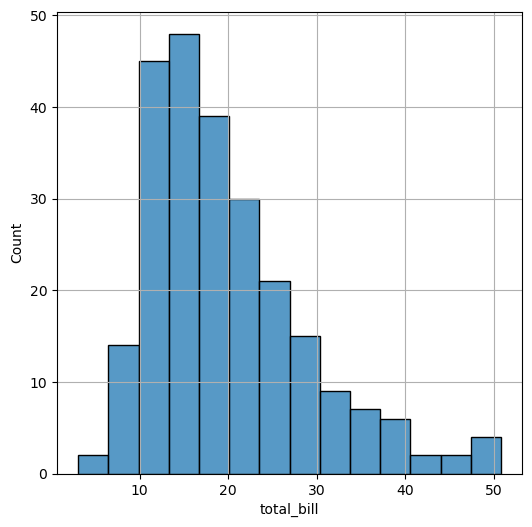

In [241]:
plt.figure(figsize=(6,6))
sns.histplot(df['total_bill'])
plt.grid()
plt.show()

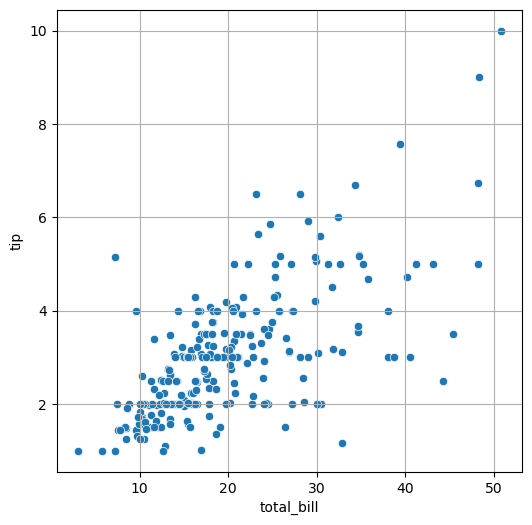

In [175]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.grid()
plt.show()

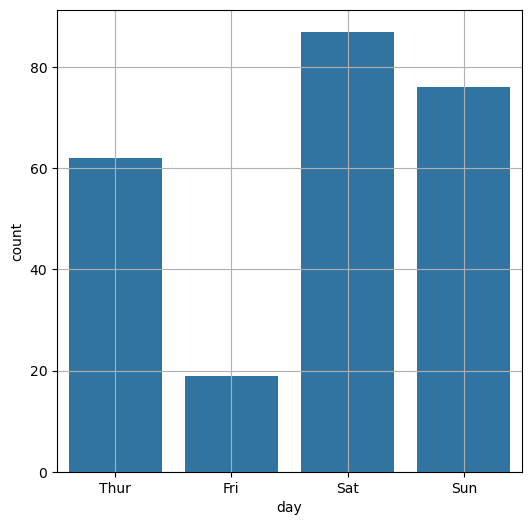

In [177]:
plt.figure(figsize=(6,6))
sns.countplot(x='day', data=df)
plt.grid()
plt.show()

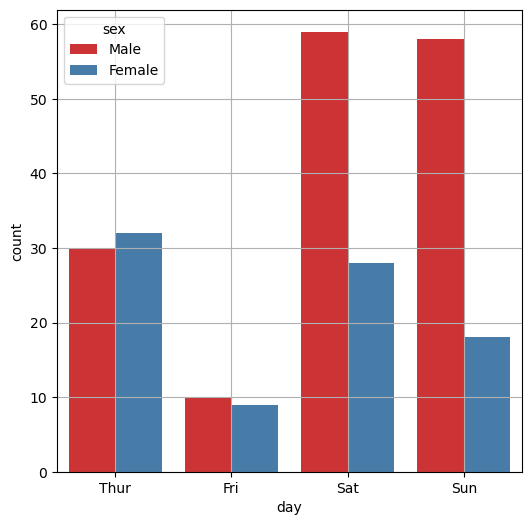

In [247]:
plt.figure(figsize=(6,6))
sns.countplot(x='day', hue='sex',data=df, palette=sns.color_palette('Set1', 2), legend=True)
plt.grid()
plt.show()

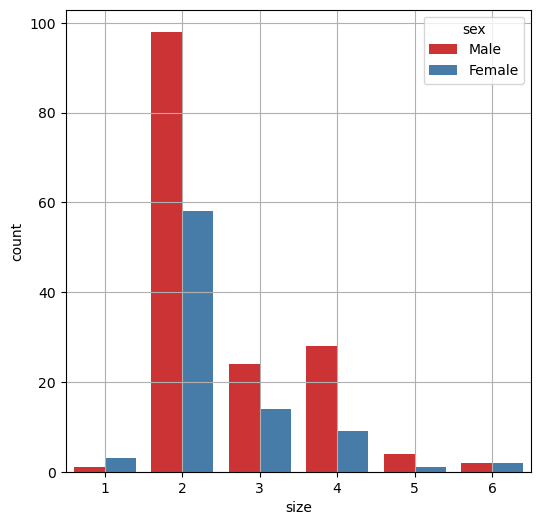

In [201]:
plt.figure(figsize=(6,6))
sns.countplot(x='size', hue='sex',data=df, palette=sns.color_palette('Set1', 2), legend=True)
plt.grid()
plt.show()

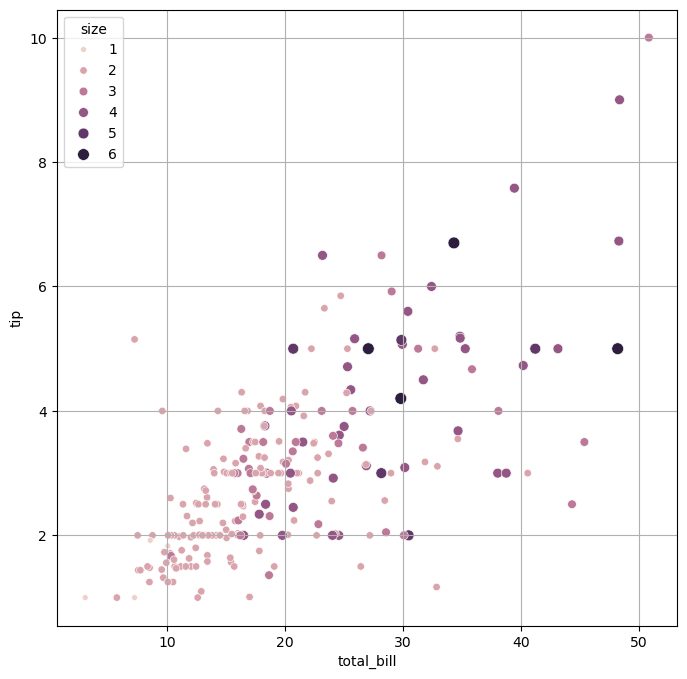

In [221]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='total_bill', y='tip', size='size' ,  hue='size', data=df)
plt.grid()
plt.show()

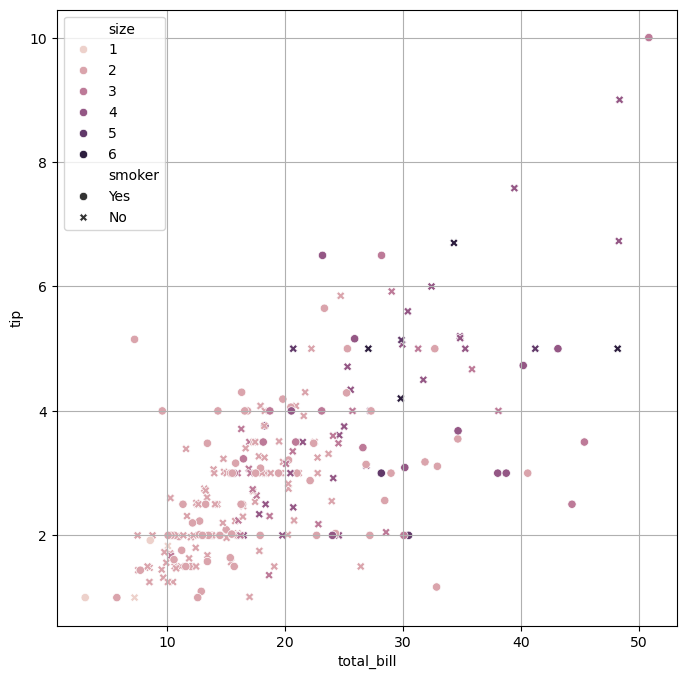

In [223]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='total_bill', y='tip', style='smoker' , hue='size', data=df)
plt.grid()
plt.show()

<Figure size 800x800 with 0 Axes>

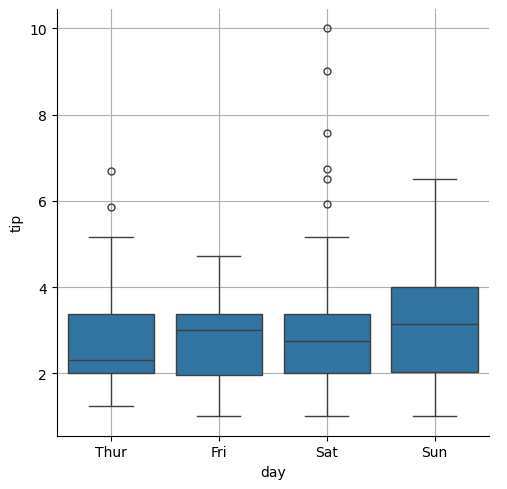

In [235]:
plt.figure(figsize=(8,8))
sns.catplot(x='day', y='tip',  kind='box', data=df)
plt.grid()
plt.show()

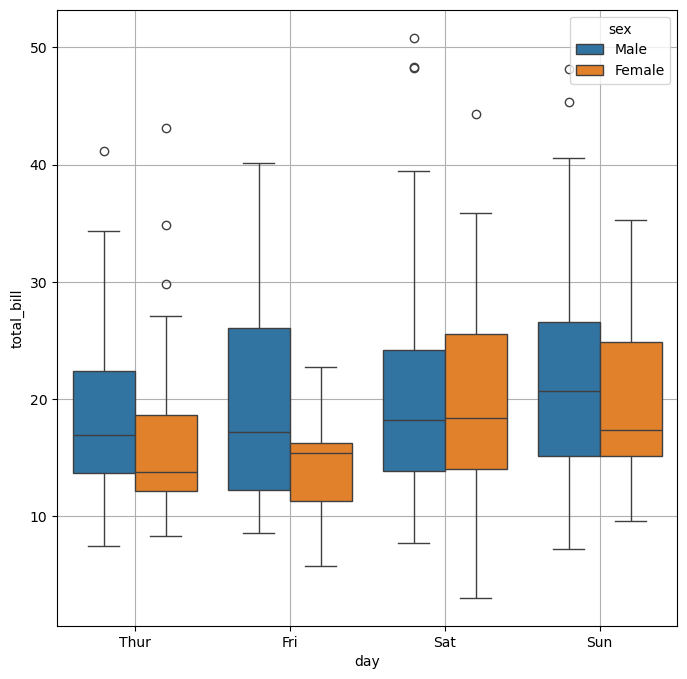

In [237]:
plt.figure(figsize=(8,8))
sns.boxplot(x='day', y='total_bill', hue='sex', data=df)
plt.grid()
plt.show()

#### 4. 데이터 전처리

- 데이터 전처리는 데이터의 품질을 높이는 중요한 작업
- 데이터 생애주기 : 원시데이터 -> 데이터 전처리 -> 원천 데이터 -> 검증/레이블링 -> 레이블링 데이터
- 데이터 분석을 위한 필수 과정, 분석 결과 오류방지, 분석결과 신뢰도 향상
  
**데이터를 분석 및 처리에 적합한 형태로 만드는 과정을 총칭하는 개념**

- 아무리 좋은 도구나 분석기법도 품질이 낮은 데이터로 좋은 결과를 얻을 수 없다.
- 데이터 전처리 단계 : 데이터 정제 / 데이터 통합 / 데이터 변환 / 데이터 축소

#### 1. 데이터 정제
- 없는 데이터는 채우고, 잡은 데이터는 제거하고, 모순된 데이터는 올바르게 교정
- NaN, null, na 값의 제거
- 누락값, 불일치, 오류 수정
- 컴퓨터로 처리할 수 없는 데이터 제거
- 날짜나 숫자 등의 형식을 일치
- 모순데이터(남자인데 주민번호 8문자가 2인 경우)

#### 2. 데이터 통합
- 출처가 다른 상호 연관성이 있는 여러 데이터들을 하나로 결합하는 과정
- 표현단위가 다른 방식에 대한 일치
- 중복된 데이터를 검출

#### 3. 데이터 변환
- 다양한 형식으로 수집된 데이터를 분석에 용이하도록 일관성있는 데이터 형식으로 변환
- 정규화 : 데이터를 노멀하게 바꿔주는 것. 최대-최소 정규화, z-score 정규화, 소수 스케일링
- 평균화(평활화) : 잡음을 제거하기 위해 데이터범위(추세) 벗어난 값을 변환
- 속성 생성 : 데이터 분포를 대표할 수 있는 새로운 컬럼을 생성

#### 4. 데이터 축소
- 분석에 필요한 데이터를 축소, 고유한 특성은 손상되지 않도록 하고 분석 효율성을 향상키는 작업
- 데이터 압축 : 데이터 인코딩, 데이터 변환을 통해 데이터 포맷 변경
- 차원축소(PCA) : 특정 구간에 분포하는 값으로 스케일 변환